In [2]:
from matplotlib import pyplot as plt
import scipy.stats as st
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
sns.set(rc={'figure.figsize':(15.7,8.27)})

In [4]:
county_demographic = pd.read_csv("resources/cc-est2019-alldata-06(1).csv")

county_demographic

,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,...,HWAC_MALE,HWAC_FEMALE,HBAC_MALE,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE
0,50,6,1,California,Alameda County,1,0,1510271,740573,769698,...,152378,145672,9669,10329,11266,10676,8261,8478,2160,2325
1,50,6,1,California,Alameda County,1,1,97652,50259,47393,...,14619,13768,1430,1348,1170,1008,1224,1245,317,313
2,50,6,1,California,Alameda County,1,2,94546,48145,46401,...,13336,13015,1124,1149,996,931,1049,952,242,249
3,50,6,1,California,Alameda County,1,3,91070,46403,44667,...,12590,12075,957,996,922,925,844,811,214,211
4,50,6,1,California,Alameda County,1,4,100394,51445,48949,...,12752,12317,951,916,945,952,800,766,218,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13219,50,6,115,California,Yuba County,12,14,3669,1816,1853,...,247,221,8,3,19,27,7,5,0,4
13220,50,6,115,California,Yuba County,12,15,2791,1296,1495,...,166,188,1,3,18,15,3,5,4,2
13221,50,6,115,California,Yuba County,12,16,1778,858,920,...,116,95,6,5,13,14,3,1,0,0
13222,50,6,115,California,Yuba County,12,17,1066,458,608,...,54,78,2,3,8,5,2,3,0,0


In [5]:
organized_data = county_demographic[["CTYNAME", "YEAR", "AGEGRP", "TOT_MALE", "TOT_FEMALE"]]

organized_data

,CTYNAME,YEAR,AGEGRP,TOT_MALE,TOT_FEMALE
0,Alameda County,1,0,740573,769698
1,Alameda County,1,1,50259,47393
2,Alameda County,1,2,48145,46401
3,Alameda County,1,3,46403,44667
4,Alameda County,1,4,51445,48949
...,...,...,...,...,...
13219,Yuba County,12,14,1816,1853
13220,Yuba County,12,15,1296,1495
13221,Yuba County,12,16,858,920
13222,Yuba County,12,17,458,608


In [6]:
total_county = len(organized_data["CTYNAME"].unique())

total_county

58

In [7]:
clean_data = organized_data.replace({"YEAR" : {3 :2010, 4 :2011, 5 :2012, 6 :2013, 7 :2014, 8 :2015, 9 : 2016, 10 :2017, 11 :2018, 12 :2019}})

clean_data

,CTYNAME,YEAR,AGEGRP,TOT_MALE,TOT_FEMALE
0,Alameda County,1,0,740573,769698
1,Alameda County,1,1,50259,47393
2,Alameda County,1,2,48145,46401
3,Alameda County,1,3,46403,44667
4,Alameda County,1,4,51445,48949
...,...,...,...,...,...
13219,Yuba County,2019,14,1816,1853
13220,Yuba County,2019,15,1296,1495
13221,Yuba County,2019,16,858,920
13222,Yuba County,2019,17,458,608


In [8]:
values = [1,2]

clean_data_v2 = clean_data[clean_data.YEAR.isin(values) == False]

clean_data_v2

,CTYNAME,YEAR,AGEGRP,TOT_MALE,TOT_FEMALE
38,Alameda County,2010,0,741756,771230
39,Alameda County,2010,1,50198,47458
40,Alameda County,2010,2,48154,46337
41,Alameda County,2010,3,46396,44587
42,Alameda County,2010,4,51061,48629
...,...,...,...,...,...
13219,Yuba County,2019,14,1816,1853
13220,Yuba County,2019,15,1296,1495
13221,Yuba County,2019,16,858,920
13222,Yuba County,2019,17,458,608


In [9]:
under_20 = clean_data_v2[(clean_data_v2["AGEGRP"] < 5) & (clean_data_v2["AGEGRP"] > 2)]
under_20

,CTYNAME,YEAR,AGEGRP,TOT_MALE,TOT_FEMALE
41,Alameda County,2010,3,46396,44587
42,Alameda County,2010,4,51061,48629
60,Alameda County,2011,3,46527,44569
61,Alameda County,2011,4,49771,47569
79,Alameda County,2012,3,46635,44683
...,...,...,...,...,...
13171,Yuba County,2017,4,2686,2372
13189,Yuba County,2018,3,3034,2866
13190,Yuba County,2018,4,2710,2394
13208,Yuba County,2019,3,3052,2917


In [10]:
over_20 = clean_data_v2[clean_data_v2["AGEGRP"] > 4]
over_20

,CTYNAME,YEAR,AGEGRP,TOT_MALE,TOT_FEMALE
43,Alameda County,2010,5,54592,52946
44,Alameda County,2010,6,56246,57329
45,Alameda County,2010,7,56339,58479
46,Alameda County,2010,8,56854,58051
47,Alameda County,2010,9,56139,56464
...,...,...,...,...,...
13219,Yuba County,2019,14,1816,1853
13220,Yuba County,2019,15,1296,1495
13221,Yuba County,2019,16,858,920
13222,Yuba County,2019,17,458,608


# Visualization

**Under 20 Visualization**

In [11]:
under_20['Total_people'] = under_20['TOT_MALE'] + under_20['TOT_FEMALE']

C:\Users\dcorr\AppData\Local\Temp\ipykernel_14432\2678284192.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  under_20['Total_people'] = under_20['TOT_MALE'] + under_20['TOT_FEMALE']


Text(0, 0.5, 'County')

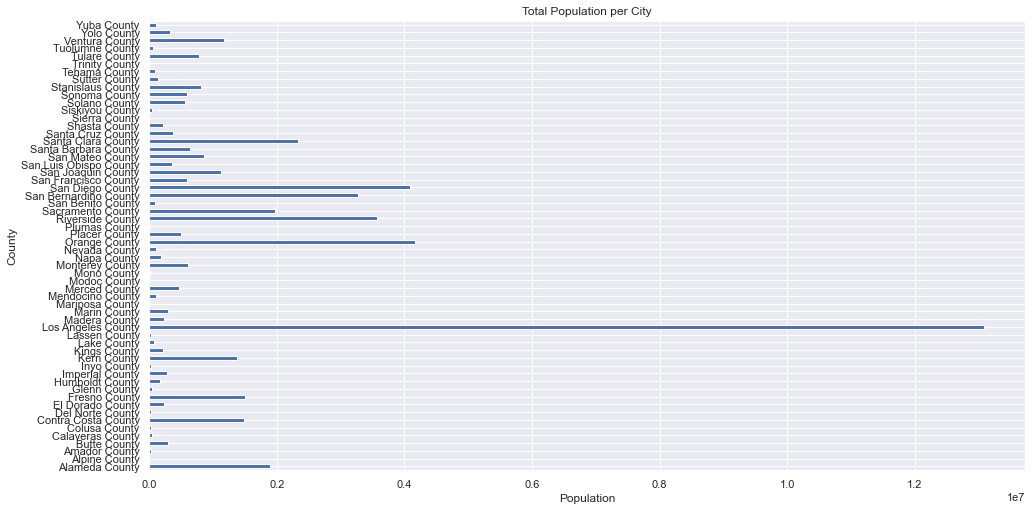

In [15]:
under_20.groupby("CTYNAME")["Total_people"].sum().plot(kind = "barh")
plt.title("Total Population per City")
plt.xlabel("Population")
plt.ylabel("County")

Text(0, 0.5, 'Year')

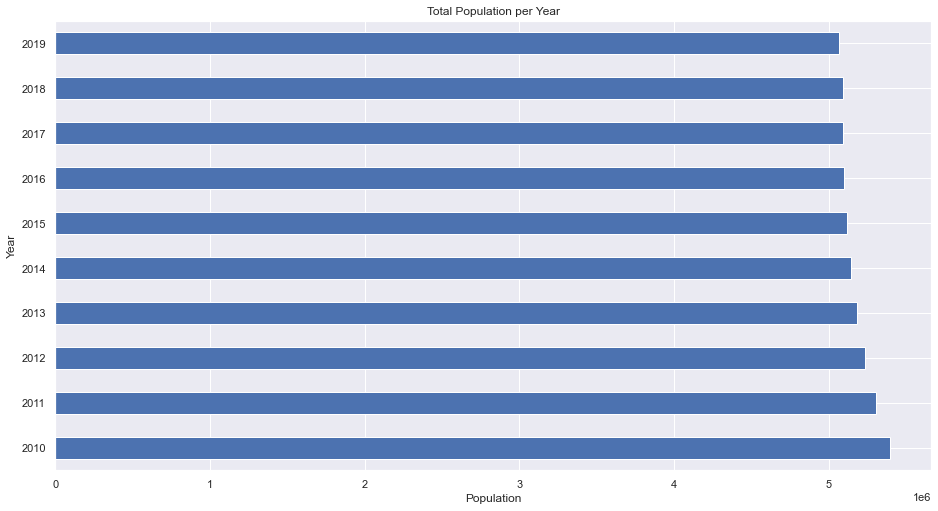

In [17]:
under_20.groupby('YEAR')["Total_people"].sum().plot(kind = "barh")
plt.title("Total Population per Year")
plt.xlabel("Population")
plt.ylabel("Year")

<function matplotlib.pyplot.show(close=None, block=None)>

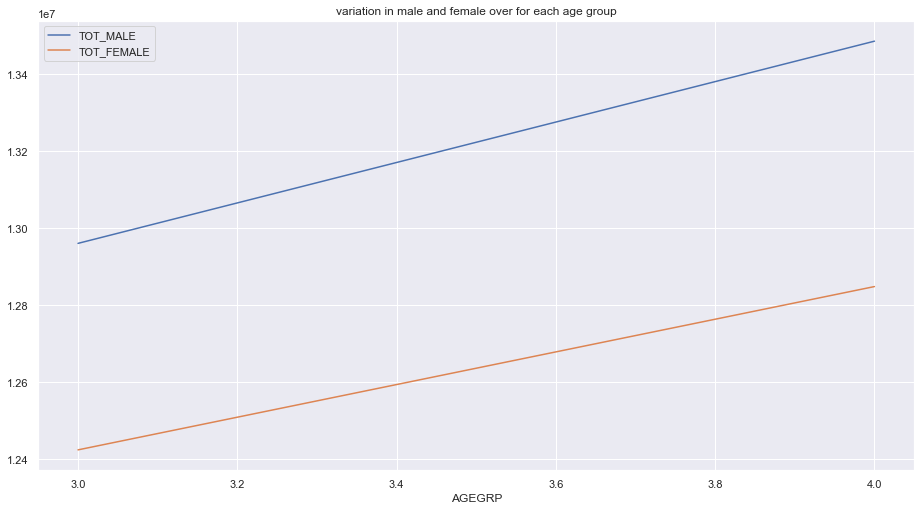

In [22]:
under_20.groupby('AGEGRP')[['TOT_MALE','TOT_FEMALE']].sum().plot(kind = 'line')
plt.title('variation in male and female over for each age group')
plt.show

**Total Male**

[Text(0.5, 1.0, 'Total number of Males in the Each Age group')]

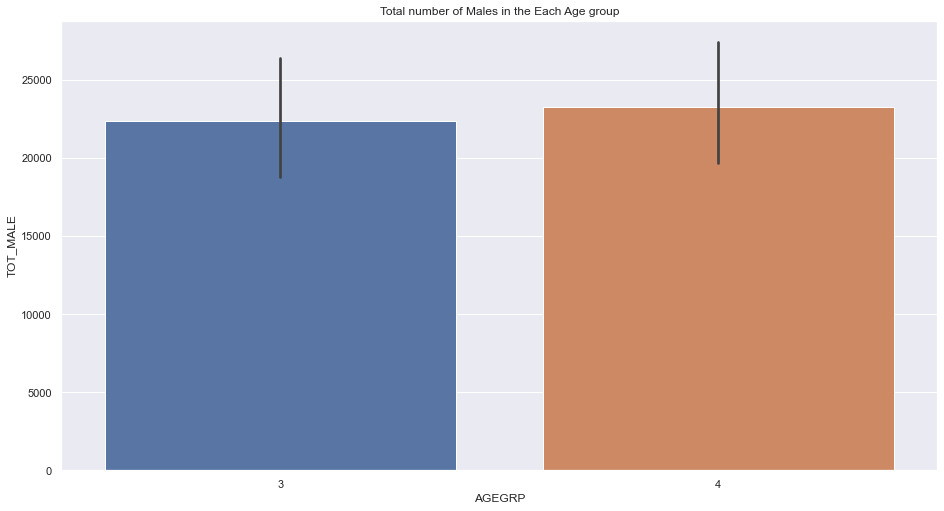

In [14]:
sns.barplot(data=under_20, x="AGEGRP", y='TOT_MALE').set(title='Total number of Males in Each Age group')

Text(0, 0.5, 'County')

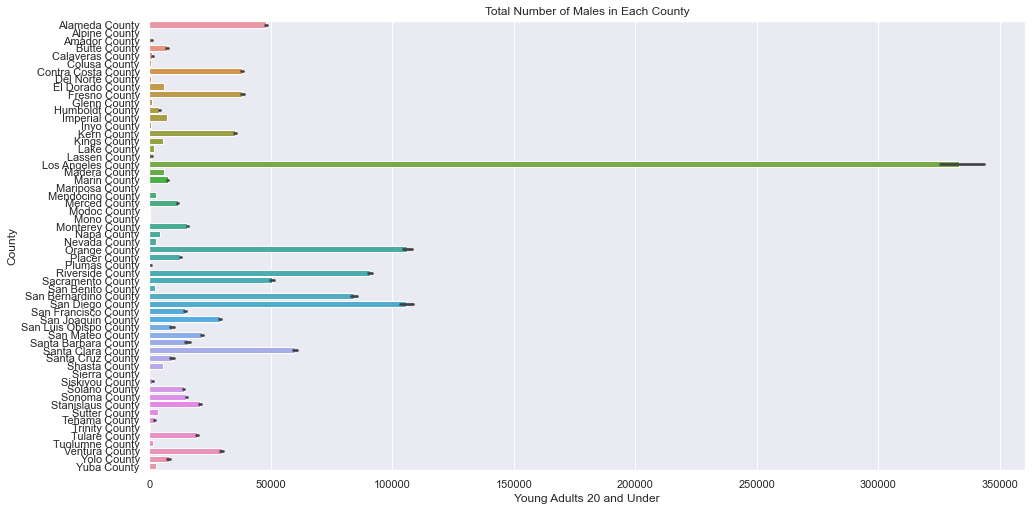

In [35]:
sns.barplot(data=under_20, y="CTYNAME", x='TOT_MALE').set(title='Total Number of Males in Each County')
plt.xlabel("Young Adults 20 and Under")
plt.ylabel("County")

Text(0, 0.5, 'Total number of Males')

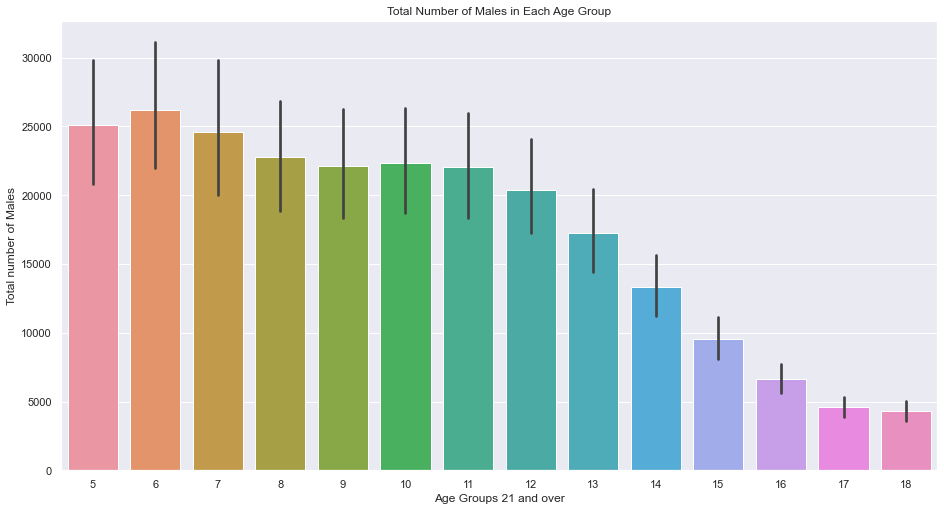

In [26]:
sns.barplot(data=over_20, x="AGEGRP", y='TOT_MALE').set(title='Total Number of Males in Each Age Group')
plt.xlabel("Age Groups 21 and Over")
plt.ylabel("Total Number of Males")

Text(0, 0.5, 'County')

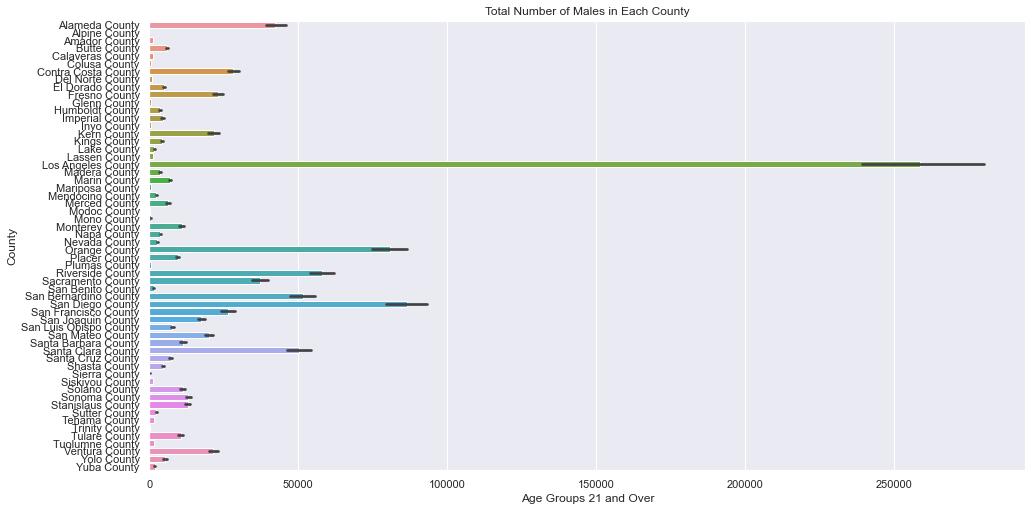

In [36]:
sns.barplot(data=over_20, y="CTYNAME", x='TOT_MALE').set(title='Total Number of Males in Each County')
plt.xlabel("Age Groups 21 and Over")
plt.ylabel("County")

**Total Female**

[Text(0.5, 1.0, 'Total number of Females in the Each Age group')]

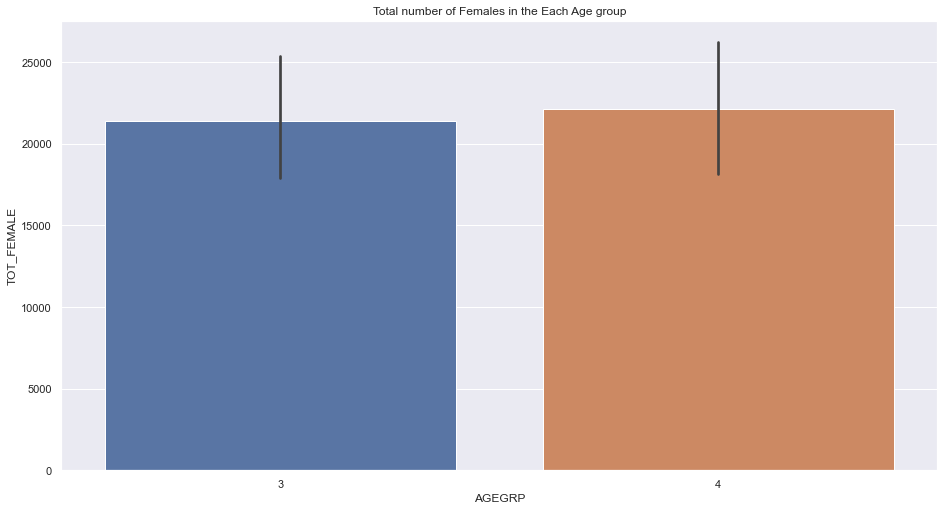

In [18]:
sns.barplot(data=under_20, x="AGEGRP", y='TOT_FEMALE').set(title='Total number of Females in Each Age group')

Text(0, 0.5, 'County')

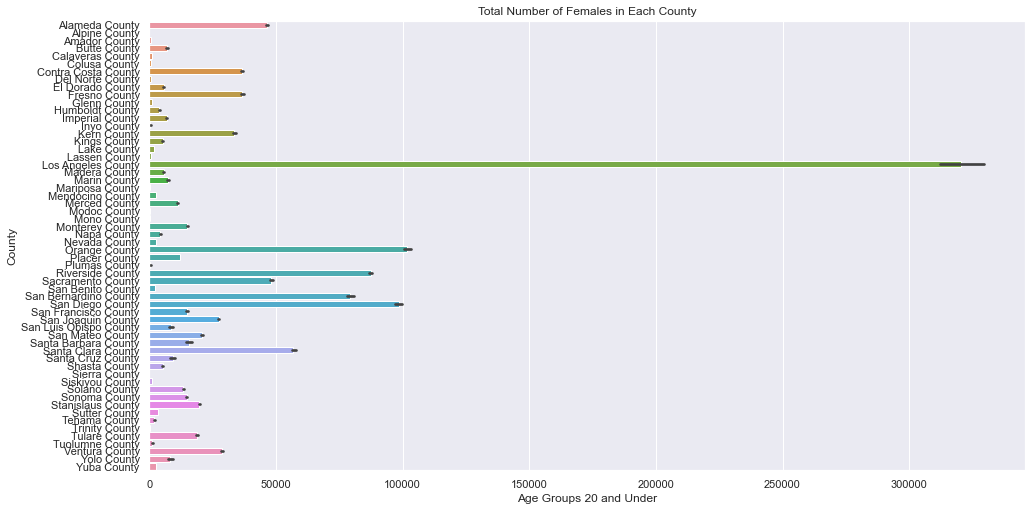

In [37]:
sns.barplot(data=under_20, y="CTYNAME", x='TOT_FEMALE').set(title='Total Number of Females in Each County')
plt.xlabel("Age Groups 20 and Under")
plt.ylabel("County")

Text(0, 0.5, 'Total Number of Females')

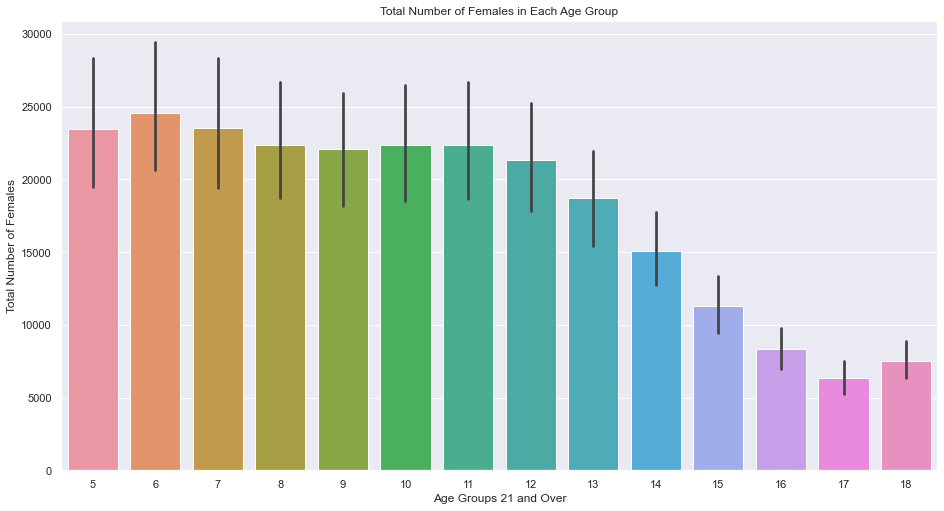

In [38]:
sns.barplot(data=over_20, x="AGEGRP", y='TOT_FEMALE').set(title='Total Number of Females in Each Age Group')
plt.xlabel("Age Groups 21 and Over")
plt.ylabel("Total Number of Females")

Text(0, 0.5, 'County')

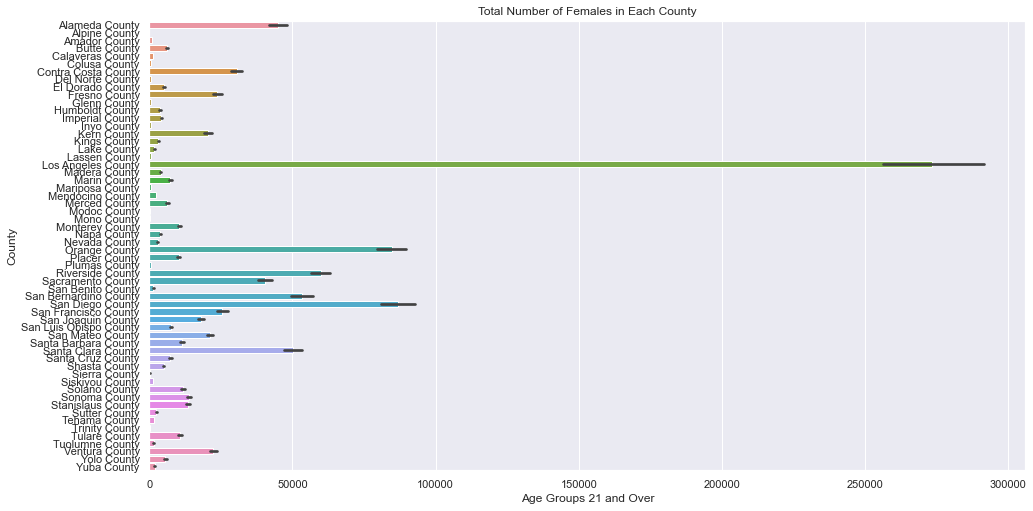

In [39]:
sns.barplot(data=over_20, y="CTYNAME", x='TOT_FEMALE').set(title='Total Number of Females in Each County')
plt.xlabel("Age Groups 21 and Over")
plt.ylabel("County")

**total cities**

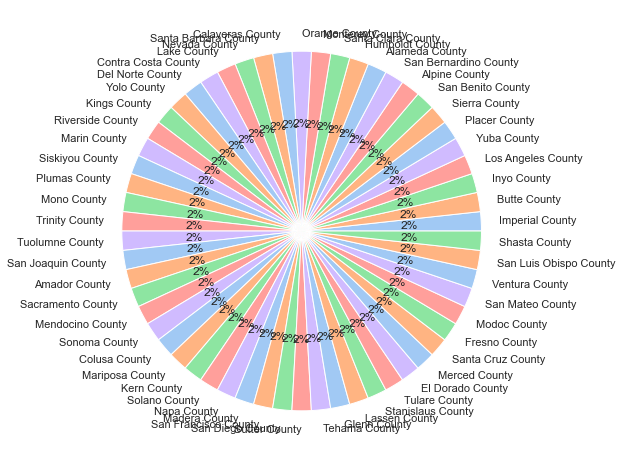

In [22]:
colors = sns.color_palette('pastel')[0:5]
#create pie chart
plt.pie(clean_data_v2['CTYNAME'].value_counts(),labels=clean_data_v2['CTYNAME'].value_counts().keys().values, colors = colors, autopct='%.0f%%')
plt.show()

In [23]:
clean_data_v2['Total_people'] = clean_data_v2['TOT_MALE'] + clean_data_v2['TOT_FEMALE']

<ipython-input-23-db25d6064791>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data_v2['Total_people'] = clean_data_v2['TOT_MALE'] + clean_data_v2['TOT_FEMALE']


Text(0.5, 1.0, 'total population per city')

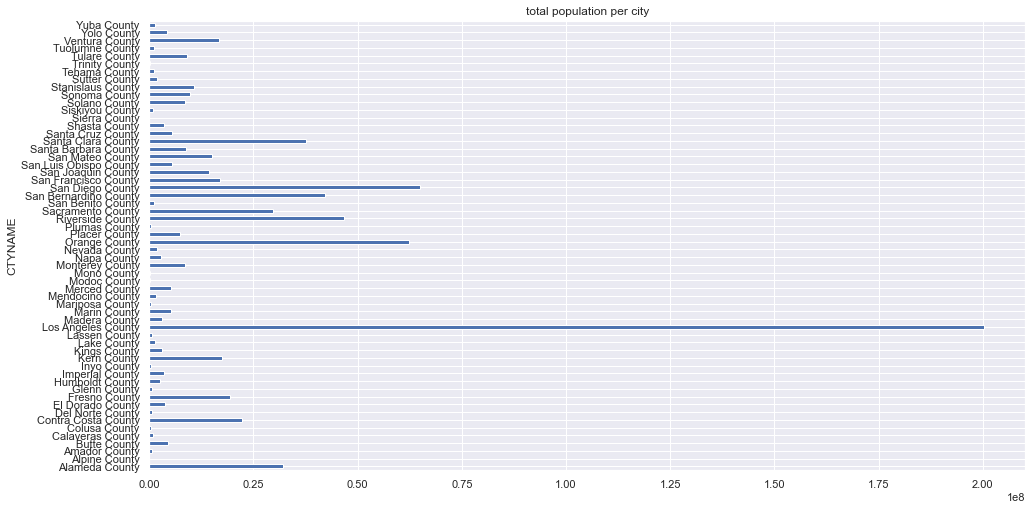

In [24]:
clean_data_v2.groupby('CTYNAME')['Total_people'].sum().plot(kind = 'barh')
plt.title('total population per city')

**year From 2010-2019**

Text(0.5, 1.0, 'total population per year')

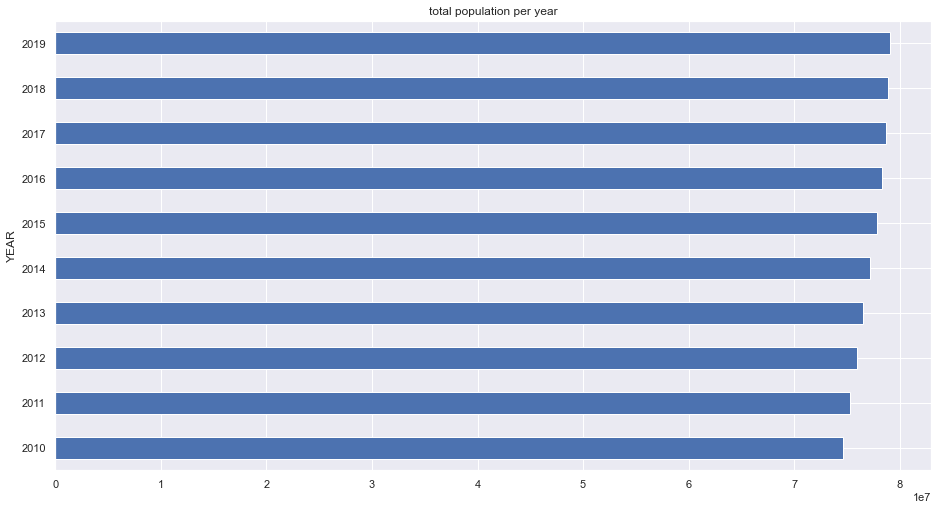

In [25]:
clean_data_v2.groupby('YEAR')['Total_people'].sum().plot(kind = 'barh')
plt.title('total population per year')

Text(0.5, 1.0, 'variation in male and female over for each year')

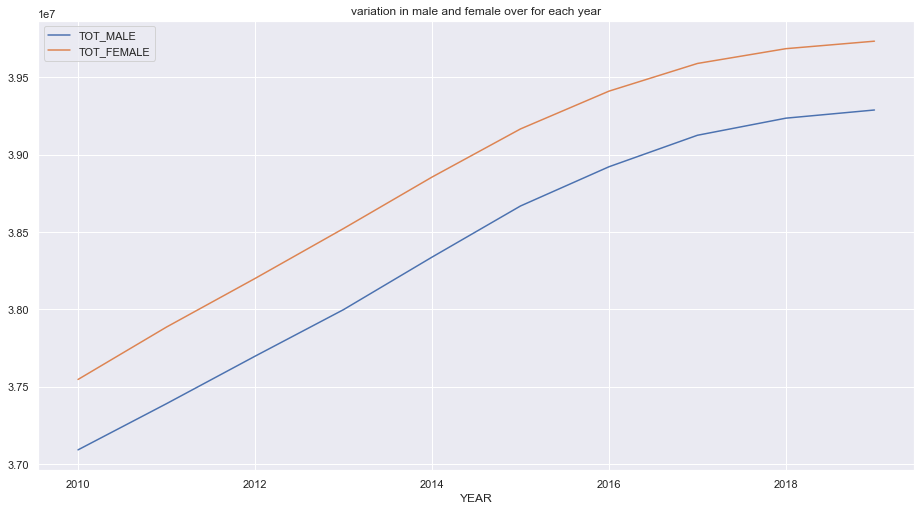

In [26]:
clean_data_v2.groupby('YEAR')[['TOT_MALE','TOT_FEMALE']].sum().plot(kind = 'line')
plt.title('variation in male and female over for each year')

Text(0.5, 1.0, 'Comparison of total male and female over years')

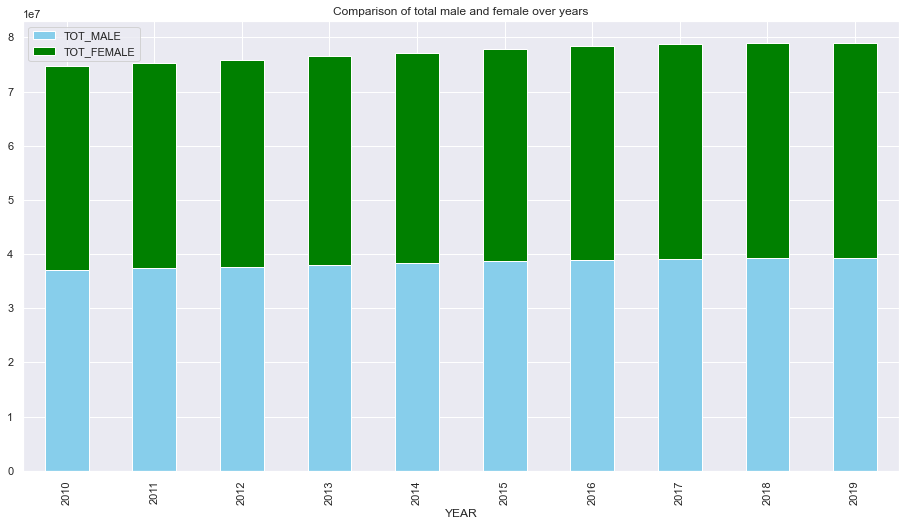

In [27]:
clean_data_v2.groupby('YEAR')[['TOT_MALE','TOT_FEMALE']].sum().plot(kind='bar', stacked=True, color=['skyblue', 'green'])
plt.title('Comparison of total male and female over years')

**Over 20 Visualization**

In [28]:
over_20['Total_people'] = over_20['TOT_MALE'] + over_20['TOT_FEMALE']

<ipython-input-28-cc5666a32df3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  over_20['Total_people'] = over_20['TOT_MALE'] + over_20['TOT_FEMALE']


Text(0.5, 1.0, 'total population per city')

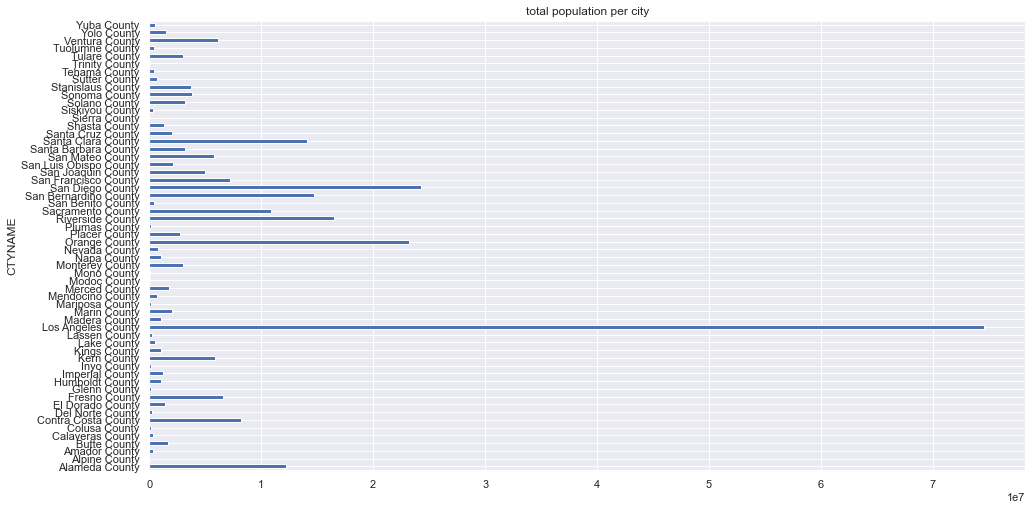

In [29]:
over_20.groupby('CTYNAME')['Total_people'].sum().plot(kind = 'barh')
plt.title('total population per city')

Text(0.5, 1.0, 'total population per year')

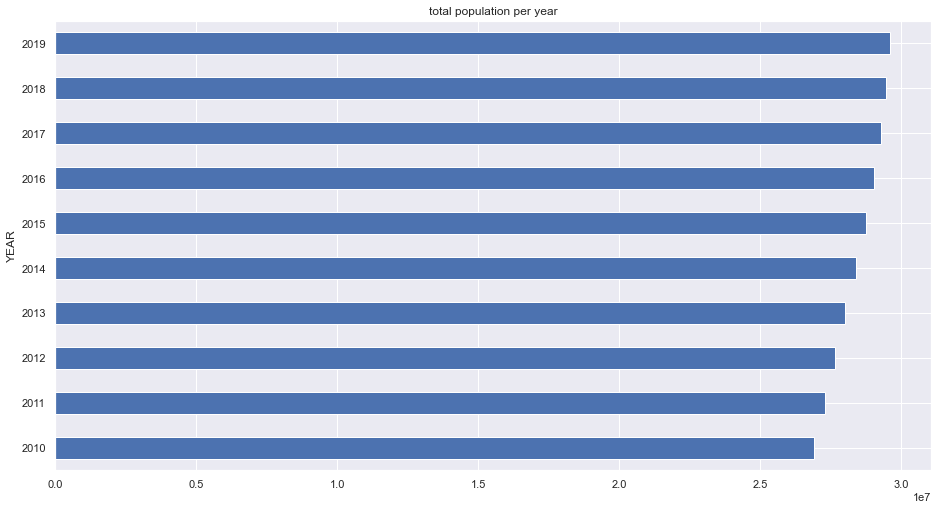

In [30]:
over_20.groupby('YEAR')['Total_people'].sum().plot(kind = 'barh')
plt.title('total population per year')

Text(0.5, 1.0, 'variation in male and female over each age group')

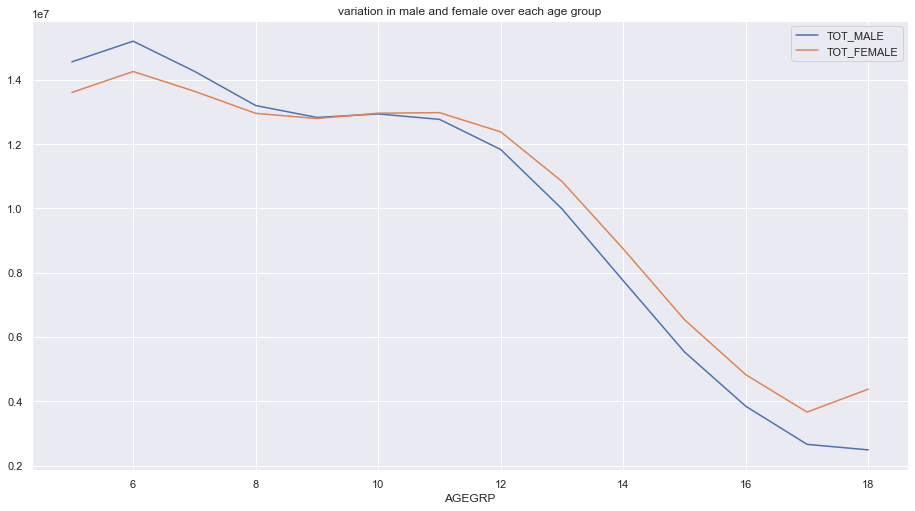

In [31]:
over_20.groupby('AGEGRP')[['TOT_MALE','TOT_FEMALE']].sum().plot(kind = 'line')
plt.title('variation in male and female over each age group')